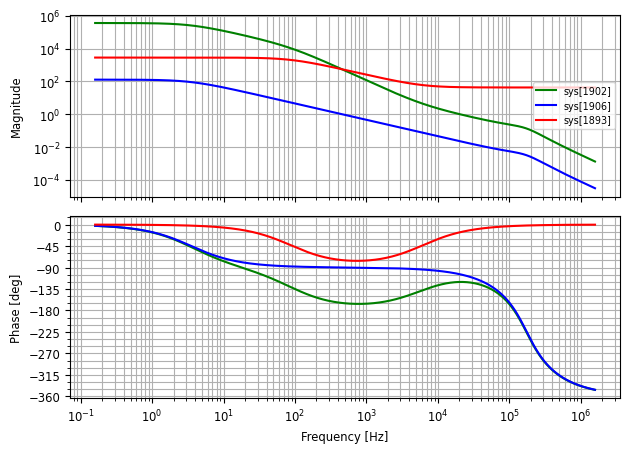

In [149]:
import control as co
import numpy as np

V_IN, V_OUT = 5, 170
N_PS = 1 / 10
D = N_PS * V_OUT / (V_IN + N_PS * V_OUT)
D_PRIME = 1 - D
L = 10e-6
R_LOAD, C_OUT = 17e+3, 4.7e-6
V_REF = 1.
f_SW = 350e+3
T_SW = 1 / f_SW
R_FB1 = 330e+3
R_FB2 = R_FB1 * V_REF / (V_OUT - V_REF)

R_s = 0.01
V_SL = 40e-3
S_n, S_f, S_e = V_IN / L, N_PS * V_OUT / L, V_SL * f_SW / R_s

g_m = 2e-3
R_ea_o = 10e+6
G_comp = 0.142
A_ea_vol = g_m * R_ea_o
f_p2, f_z3 = 90, 6000

R_c1 = f_p2 / (f_z3 - f_p2) * R_ea_o
C_c1 = 1 / (R_c1 * 2 * np.pi * f_z3)
A_ea = A_ea_vol * G_comp

F_m = 1 / (R_s * (S_n + S_e) * T_SW)
G_di = co.tf([(S_n + S_f)], [1, 0])
H_e = co.tf([1 / ((np.pi * f_SW) ** 2), -1 / (2 * f_SW), 1], [1])

G_ivo = N_PS * co.tf([-V_OUT * L / (V_IN * R_LOAD * D_PRIME * N_PS), 1], [C_OUT / D_PRIME, 1 / (D_PRIME * R_LOAD) + N_PS * V_OUT / (V_IN * R_LOAD)])

G_div = R_FB2 / (R_FB1 + R_FB2)

G_fb = A_ea * co.tf([1 / (2 * np.pi * f_z3), 1], [1 / (2 * np.pi * f_p2), 1])

G_inner_loop = co.feedback(F_m * G_di, R_s * H_e)

G_overall_loop = G_inner_loop * G_ivo * G_div * G_fb

co.bode(G_overall_loop, np.logspace(0, 7, 1000), Hz=True, color='green')
co.bode(G_inner_loop * G_ivo * G_div, np.logspace(0, 7, 1000), Hz=True, color='blue')
co.bode(G_fb, np.logspace(0, 7, 1000), Hz=True, color='red')


In [118]:
f_CROSS = f_SW / 10
f_cross = R_LOAD * (D_PRIME ** 2) / (5 * 2 * np.pi * L)

print(f_CROSS, f_cross)

35000.0 2795076.4799196497


In [110]:
print(D)


0.7727272727272727


In [111]:
print(R_FB2 / (R_FB1 + R_FB2) * V_OUT)


1.0


In [112]:
print(R_FB1, R_FB2)


330000.0 1952.6627218934912


In [113]:
print(S_n, S_f, S_e)
print((S_f - S_e) / (S_n + S_e))


499999.99999999994 1699999.9999999998 2333333.3333333335
-0.223529411764706


In [114]:
R_FA = 2.21 * 10 ** 10 / f_SW -955

print(R_FA)


62187.857142857145


In [115]:
print(R_c1, C_c1)

50251.25628140703 3.1671833675287174e-09


In [116]:
delta_i_p = V_IN / L * D * T_SW
delta_i_s = delta_i_p * N_PS
delta_v_o = V_OUT / (R_LOAD * C_OUT) * D * T_SW
i_L = V_OUT / (N_PS * D_PRIME * R_LOAD)

print(delta_i_p, delta_v_o, i_L)


1.1038961038961037 0.046974302293451224 4.3999999999999995
